# Ejercicio 11. Bootstrap para calculo de la varianza

En el anexo XVII del Reglamento Delegado, figuran los requisitos y demostraciones que deben realizarse para la aprobación de parámetros específicos de empresa. Entre ellos, se debe demostrar que la siniestralidad agregada sigue una distribución logarítmica normal $LN(\mu,\sigma)$.
Se pide, partiendo de los siniestros recogidos en el fichero *siniestralidad_agregada.csv*:
* Calcular la media y varianza valiéndose de la técnica de remuestreo (bootstrap)
obteniendo 10000 $\overline{s}$.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

df = pd.read_csv('siniestralidad_agregada.csv', sep=";", decimal=",")
siniestralidad_agregada = df['Importe'].sum()
print('Siniestralidad agregada: ', siniestralidad_agregada)

Siniestralidad agregada:  3059720.09


In [2]:
n = df.Importe.count()
b = 10000

sampling = pd.DataFrame(data=np.zeros(b),columns=['s'])
for i in range(b):
    sample = df.sample(n, replace=True)
    summ = sample['Importe'].sum()
    sampling.loc[i,'s'] = summ

sampling['z'] = np.log(sampling['s'])
boot_mean = sampling['z'].mean()
boot_std = sampling['z'].std()
#variables candidatas LN(mu=boot_mean, sigma=boot_stp)
print(boot_mean, boot_std)
#print(sampling['z'].describe())

14.933800356600928 0.004983747897374381


* Calcular los principales percentiles (.25, .5, 0.75) de la distribución teórica y compararlos
con los datos de la distribución empírica de los siniestros.

*AYUDA: siendo s la siniestralidad total y z la variable aleatoria normal, entonces $s = e^{z}$ y $z = log(s)$ con media y varianza:*

$E(s) = e^{\mu+\frac{\sigma^2}{2}}$
$Var(s) = (e^{\sigma^2} -1) e^{2\mu+\sigma^2}$

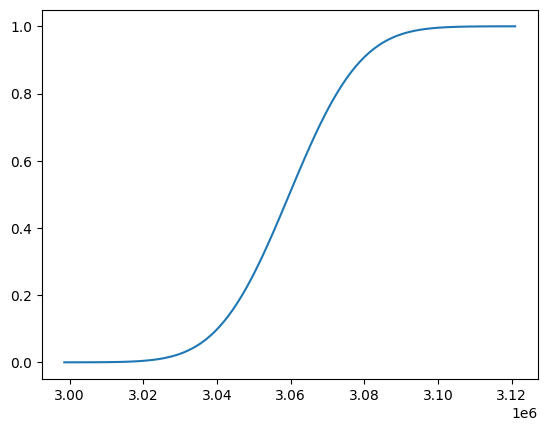

In [3]:
mu=boot_mean
sigma=boot_std 
lognormal = st.lognorm(s=sigma,scale=np.exp(mu))
x = np.linspace(siniestralidad_agregada*0.98, siniestralidad_agregada*1.02, 100)
plt.plot(x, lognormal.cdf(x))
plt.show()